# keras

## doc
https://keras.io/zh/

https://keras.io/

## github
https://github.com/keras-team

### 预训练网络 如vgg、seq2seq等
https://github.com/keras-team/keras-applications

# tf.keras概览
https://tensorflow.google.cn/api_docs/python/tf/keras

In [18]:
import tensorflow as tf
from tensorflow import keras

In [17]:
print(tf.__version__)

2.0.0


## Build a simple model--Sequential model

In [19]:
from tensorflow.keras import layers

model = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(layers.Dense(64, activation='relu'))
# Add another:
model.add(layers.Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(layers.Dense(10, activation='softmax'))

### Configure the layers
* activation: Set the activation function for the layer. This parameter is specified by the name of a built-in function or as a callable object. By default, no activation is applied.
* kernel_initializer and bias_initializer: The initialization schemes that create the layer's weights (kernel and bias). This parameter is a name or a callable object. This defaults to the "Glorot uniform" initializer.
* kernel_regularizer and bias_regularizer: The regularization schemes that apply the layer's weights (kernel and bias), such as L1 or L2 regularization. By default, no regularization is applied.

In [20]:
# Create a sigmoid layer:
layers.Dense(64, activation='sigmoid')
# Or:
layers.Dense(64, activation=tf.keras.activations.sigmoid)

# A linear layer with L1 regularization of factor 0.01 applied to the kernel matrix:
layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l1(0.01))

# A linear layer with L2 regularization of factor 0.01 applied to the bias vector:
layers.Dense(64, bias_regularizer=tf.keras.regularizers.l2(0.01))

# A linear layer with a kernel initialized to a random orthogonal matrix:
layers.Dense(64, kernel_initializer='orthogonal')

# A linear layer with a bias vector initialized to 2.0s:
layers.Dense(64, bias_initializer=tf.keras.initializers.Constant(2.0))

### Train and evaluate

In [21]:
model = tf.keras.Sequential([
# Adds a densely-connected layer with 64 units to the model:
layers.Dense(64, activation='relu', input_shape=(32,)),
# Add another:
layers.Dense(64, activation='relu'),
# Add a softmax layer with 10 output units:
layers.Dense(10, activation='softmax')])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

tf.keras.Model.compile takes three important arguments:

* optimizer: This object specifies the training procedure. Pass it optimizer instances from the tf.keras.optimizers module, such as tf.keras.optimizers.Adam or tf.keras.optimizers.SGD. If you just want to use the default parameters, you can also specify optimizers via strings, such as 'adam' or 'sgd'.
* loss: The function to minimize during optimization. Common choices include mean square error (mse), categorical_crossentropy, and binary_crossentropy. Loss functions are specified by name or by passing a callable object from the tf.keras.losses module.
* metrics: Used to monitor training. These are string names or callables from the tf.keras.metrics module.
* Additionally, to make sure the model trains and evaluates eagerly, you can make sure to pass run_eagerly=True as a parameter to compile.

The following shows a few examples of configuring a model for training:

In [ ]:
# Configure a model for mean-squared error regression.
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse',       # mean squared error
              metrics=['mae'])  # mean absolute error

# Configure a model for categorical classification.
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

### Train from NumPy data

In [22]:
import numpy as np

data = np.random.random((1000, 32))
labels = np.random.random((1000, 10))

model.fit(data, labels, epochs=10, batch_size=32)

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 1s 660us/sample - loss: 25.7322 - accuracy: 0.1130
Epoch 2/10
1000/1000 [==============================] - 0s 59us/sample - loss: 208.8320 - accuracy: 0.1120
Epoch 3/10
1000/1000 [==============================] - 0s 50us/sample - loss: 929.5049 - accuracy: 0.1030
Epoch 4/10
1000/1000 [==============================] - 0s 50us/sample - loss: 1703.7768 - accuracy: 0.0990
Epoch 5/10
1000/1000 [==============================] - 0s 57us/sample - loss: 4012.0033 - accuracy: 0.1060
Epoch 6/10
1000/1000 [==============================] - 0s 46us/sample - loss: 7791.5488 - accuracy: 0.1070
Epoch 7/10
1000/1000 [==============================] - 0s 52us/sample - loss: 11280.8306 - accuracy: 0.0840
Epoch 8/10
1000/1000 [==============================] - 0s 49us/sample - loss: 20020.8224 - accuracy: 0.0890
Epoch 9/10
1000/1000 [==============================] - 0s 43us/sample - loss: 19549.7783 - accuracy: 0.1080
Epoch 

Here's an example using validation_data:

In [23]:
import numpy as np

data = np.random.random((1000, 32))
labels = np.random.random((1000, 10))

val_data = np.random.random((100, 32))
val_labels = np.random.random((100, 10))

model.fit(data, labels, epochs=10, batch_size=32,
          validation_data=(val_data, val_labels))

Train on 1000 samples, validate on 100 samples
Epoch 1/10
1000/1000 [==============================] - 0s 148us/sample - loss: 40965.3121 - accuracy: 0.1060 - val_loss: 54195.8666 - val_accuracy: 0.0400
Epoch 2/10
1000/1000 [==============================] - 0s 81us/sample - loss: 49548.4699 - accuracy: 0.1050 - val_loss: 41730.7855 - val_accuracy: 0.1300
Epoch 3/10
1000/1000 [==============================] - 0s 88us/sample - loss: 50720.4791 - accuracy: 0.1000 - val_loss: 55317.3403 - val_accuracy: 0.0800
Epoch 4/10
1000/1000 [==============================] - 0s 65us/sample - loss: 63645.3235 - accuracy: 0.1080 - val_loss: 74619.0509 - val_accuracy: 0.1300
Epoch 5/10
1000/1000 [==============================] - 0s 60us/sample - loss: 81001.9045 - accuracy: 0.0970 - val_loss: 105868.2666 - val_accuracy: 0.0800
Epoch 6/10
1000/1000 [==============================] - 0s 62us/sample - loss: 114409.0335 - accuracy: 0.1130 - val_loss: 164796.9225 - val_accuracy: 0.0800
Epoch 7/10
1000/100

### Train from tf.data datasets
Use the Datasets API to scale to large datasets or multi-device training. Pass a tf.data.Dataset instance to the fit method:

In [24]:
# Instantiates a toy dataset instance:
dataset = tf.data.Dataset.from_tensor_slices((data, labels))
dataset = dataset.batch(32)

model.fit(dataset, epochs=10)

Epoch 1/10
32/32 [==============================] - 0s 5ms/step - loss: 123703.0825 - accuracy: 0.1030
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 106241.4956 - accuracy: 0.0990
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 173562.8943 - accuracy: 0.0930
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 205254.7680 - accuracy: 0.0890
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 177919.0564 - accuracy: 0.1170
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 223075.0376 - accuracy: 0.0850
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 177457.0407 - accuracy: 0.0950
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 167000.0721 - accuracy: 0.1030
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 189559.0902 - accuracy: 0.0840
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 

Datasets can also be used for validation:

In [25]:
dataset = tf.data.Dataset.from_tensor_slices((data, labels))
dataset = dataset.batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_dataset = val_dataset.batch(32)

model.fit(dataset, epochs=10,
          validation_data=val_dataset)

Epoch 1/10
32/32 [==============================] - 0s 4ms/step - loss: 359380.5967 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 345115.9201 - accuracy: 0.1040 - val_loss: 156944.9336 - val_accuracy: 0.1200
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 225164.5492 - accuracy: 0.0950 - val_loss: 389806.0781 - val_accuracy: 0.1600
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 303205.6797 - accuracy: 0.1120 - val_loss: 209036.5039 - val_accuracy: 0.0800
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 294900.3774 - accuracy: 0.0900 - val_loss: 265484.1953 - val_accuracy: 0.0700
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 351249.5470 - accuracy: 0.1050 - val_loss: 380213.3672 - val_accuracy: 0.0800
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 402041.9904 - accuracy: 0

### Evaluate and predict

In [27]:
# With Numpy arrays
data = np.random.random((1000, 32))
labels = np.random.random((1000, 10))

model.evaluate(data, labels, batch_size=32)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[572681.335, 0.092]

In [28]:
# With a Dataset
dataset = tf.data.Dataset.from_tensor_slices((data, labels))
dataset = dataset.batch(32)

model.evaluate(dataset)

32/32 [==============================] - 0s 958us/step - loss: 572683.1934 - accuracy: 0.0920


[572683.193359375, 0.092]

In [29]:
result = model.predict(data, batch_size=32)
print(result.shape)

(1000, 10)


## Build complex models--The Functional API
The tf.keras.Sequential model is a simple stack of layers that cannot represent arbitrary models. Use the Keras functional API to build complex model topologies such as:

* Multi-input models,
* Multi-output models,
* Models with shared layers (the same layer called several times),
* Models with non-sequential data flows (e.g. residual connections).

Building a model with the functional API works like this:

1. A layer instance is callable and returns a tensor.
1. Input tensors and output tensors are used to define a tf.keras.Model instance.
1. This model is trained just like the Sequential model.

In [30]:
inputs = tf.keras.Input(shape=(32,))  # Returns an input placeholder

# A layer instance is callable on a tensor, and returns a tensor.
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
predictions = layers.Dense(10, activation='softmax')(x)

In [31]:
model = tf.keras.Model(inputs=inputs, outputs=predictions)

# The compile step specifies the training configuration.
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Trains for 5 epochs
model.fit(data, labels, batch_size=32, epochs=5)

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 1s 501us/sample - loss: 13.6575 - accuracy: 0.0960
Epoch 2/5
1000/1000 [==============================] - 0s 50us/sample - loss: 22.3767 - accuracy: 0.0920
Epoch 3/5
1000/1000 [==============================] - 0s 49us/sample - loss: 35.9141 - accuracy: 0.0860
Epoch 4/5
1000/1000 [==============================] - 0s 44us/sample - loss: 52.3935 - accuracy: 0.1030
Epoch 5/5
1000/1000 [==============================] - 0s 50us/sample - loss: 72.4794 - accuracy: 0.1010


### Inception
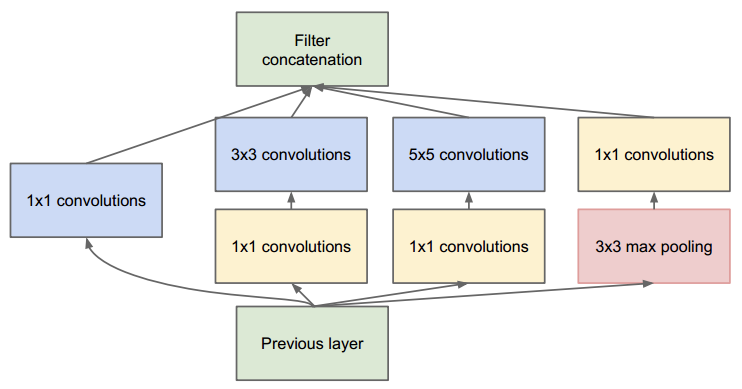

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Input

input_img = Input(shape=(256, 256, 3))

tower_1 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3, 3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(64, (5, 5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_img)
tower_3 = Conv2D(64, (1, 1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis=1)

### Model subclassing

In [32]:
class MyModel(tf.keras.Model):

  def __init__(self, num_classes=10):
    super(MyModel, self).__init__(name='my_model')
    self.num_classes = num_classes
    # Define your layers here.
    self.dense_1 = layers.Dense(32, activation='relu')
    self.dense_2 = layers.Dense(num_classes, activation='sigmoid')

  def call(self, inputs):
    # Define your forward pass here,
    # using layers you previously defined (in `__init__`).
    x = self.dense_1(inputs)
    return self.dense_2(x)

In [33]:
# Instantiate the new model class:
model = MyModel(num_classes=10)

# The compile step specifies the training configuration.
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Trains for 5 epochs.
model.fit(data, labels, batch_size=32, epochs=5)

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 1s 1ms/sample - loss: 11.4251 - accuracy: 0.0890
Epoch 2/5
1000/1000 [==============================] - 0s 53us/sample - loss: 11.4008 - accuracy: 0.1030
Epoch 3/5
1000/1000 [==============================] - 0s 52us/sample - loss: 11.3957 - accuracy: 0.1120
Epoch 4/5
1000/1000 [==============================] - 0s 50us/sample - loss: 11.3928 - accuracy: 0.1060
Epoch 5/5
1000/1000 [==============================] - 0s 61us/sample - loss: 11.3915 - accuracy: 0.1100


### Custom layers
Create a custom layer by subclassing tf.keras.layers.Layer and implementing the following methods:

* `__init__`: Optionally define sublayers to be used by this layer.
* build: Create the weights of the layer. Add weights with the add_weight method.
* call: Define the forward pass.
* Optionally, a layer can be serialized by implementing the get_config method and the from_config class method.

Here's an example of a custom layer that implements a matmul of an input with a kernel matrix:

In [34]:
class MyLayer(layers.Layer):

  def __init__(self, output_dim, **kwargs):
    self.output_dim = output_dim
    super(MyLayer, self).__init__(**kwargs)

  def build(self, input_shape):
    # Create a trainable weight variable for this layer.
    self.kernel = self.add_weight(name='kernel',
                                  shape=(input_shape[1], self.output_dim),
                                  initializer='uniform',
                                  trainable=True)

  def call(self, inputs):
    return tf.matmul(inputs, self.kernel)

  def get_config(self):
    base_config = super(MyLayer, self).get_config()
    base_config['output_dim'] = self.output_dim
    return base_config

  @classmethod
  def from_config(cls, config):
    return cls(**config)

In [35]:
# Create a model using your custom layer:
model = tf.keras.Sequential([
    MyLayer(10),
    layers.Activation('softmax')])

# The compile step specifies the training configuration
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Trains for 5 epochs.
model.fit(data, labels, batch_size=32, epochs=5)

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 292us/sample - loss: 11.4139 - accuracy: 0.1060
Epoch 2/5
1000/1000 [==============================] - 0s 41us/sample - loss: 11.4144 - accuracy: 0.1070
Epoch 3/5
1000/1000 [==============================] - 0s 46us/sample - loss: 11.4143 - accuracy: 0.1070
Epoch 4/5
1000/1000 [==============================] - 0s 47us/sample - loss: 11.4145 - accuracy: 0.1080
Epoch 5/5
1000/1000 [==============================] - 0s 46us/sample - loss: 11.4137 - accuracy: 0.1070


## Callbacks
A callback is an object passed to a model to customize and extend its behavior during training. You can write your own custom callback, or use the built-in tf.keras.callbacks that include:

* tf.keras.callbacks.ModelCheckpoint: Save checkpoints of your model at regular intervals.
* tf.keras.callbacks.LearningRateScheduler: Dynamically change the learning rate.
* tf.keras.callbacks.EarlyStopping: Interrupt training when validation performance has stopped improving.
* tf.keras.callbacks.TensorBoard: Monitor the model's behavior using TensorBoard.

To use a tf.keras.callbacks.Callback, pass it to the model's fit method:

In [36]:
callbacks = [
  # Interrupt training if `val_loss` stops improving for over 2 epochs
  tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]
model.fit(data, labels, batch_size=32, epochs=5, callbacks=callbacks,
          validation_data=(val_data, val_labels))

Train on 1000 samples, validate on 100 samples
Epoch 1/5
1000/1000 [==============================] - 0s 222us/sample - loss: 11.4132 - accuracy: 0.1030 - val_loss: 11.7068 - val_accuracy: 0.0600
Epoch 2/5
1000/1000 [==============================] - 0s 65us/sample - loss: 11.4137 - accuracy: 0.1030 - val_loss: 11.7069 - val_accuracy: 0.0700
Epoch 3/5
1000/1000 [==============================] - 0s 111us/sample - loss: 11.4131 - accuracy: 0.1020 - val_loss: 11.7064 - val_accuracy: 0.0700
Epoch 4/5
1000/1000 [==============================] - 0s 84us/sample - loss: 11.4126 - accuracy: 0.1040 - val_loss: 11.7056 - val_accuracy: 0.0700
Epoch 5/5
1000/1000 [==============================] - 0s 66us/sample - loss: 11.4123 - accuracy: 0.1030 - val_loss: 11.7061 - val_accuracy: 0.0700


## Save and restore

### Save just the weights values
Save and load the weights of a model using tf.keras.Model.save_weights:

In [37]:
model = tf.keras.Sequential([
layers.Dense(64, activation='relu', input_shape=(32,)),
layers.Dense(10, activation='softmax')])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
# Save weights to a TensorFlow Checkpoint file
model.save_weights('./weights/my_model')

# Restore the model's state,
# this requires a model with the same architecture.
model.load_weights('./weights/my_model')

By default, this saves the model's weights in the TensorFlow checkpoint file format. Weights can also be saved to the Keras HDF5 format (the default for the multi-backend implementation of Keras):

In [39]:
# Save weights to a HDF5 file
model.save_weights('my_model.h5', save_format='h5')

# Restore the model's state
model.load_weights('my_model.h5')

### Save just the model configuration
A model's configuration can be saved—this serializes the model architecture without any weights. A saved configuration can recreate and initialize the same model, even without the code that defined the original model. Keras supports JSON and YAML serialization formats:

In [40]:
# Serialize a model to JSON format
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_3", "layers": [{"class_name": "Dense", "config": {"name": "dense_17", "trainable": true, "batch_input_shape": [null, 32], "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_18", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}]}, "keras_version": "2.2.4-tf", "backen

In [41]:
import json
import pprint
pprint.pprint(json.loads(json_string))

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'Dense',
                        'config': {'activation': 'relu',
                                   'activity_regularizer': None,
                                   'batch_input_shape': [None, 32],
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config': {}},
                                   'bias_regularizer': None,
                                   'dtype': 'float32',
                                   'kernel_constraint': None,
                                   'kernel_initializer': {'class_name': 'GlorotUniform',
                                                          'config': {'seed': None}},
                                   'kernel_regularizer': None,
                                   'name': 'dense_17',
                            

Recreate the model (newly initialized) from the JSON:

In [42]:
fresh_model = tf.keras.models.model_from_json(json_string)

Serializing a model to YAML format requires that you install pyyaml before you import TensorFlow:

In [43]:
yaml_string = model.to_yaml()
print(yaml_string)

backend: tensorflow
class_name: Sequential
config:
  layers:
  - class_name: Dense
    config:
      activation: relu
      activity_regularizer: null
      batch_input_shape: !!python/tuple
      - null
      - 32
      bias_constraint: null
      bias_initializer:
        class_name: Zeros
        config: {}
      bias_regularizer: null
      dtype: float32
      kernel_constraint: null
      kernel_initializer:
        class_name: GlorotUniform
        config:
          seed: null
      kernel_regularizer: null
      name: dense_17
      trainable: true
      units: 64
      use_bias: true
  - class_name: Dense
    config:
      activation: softmax
      activity_regularizer: null
      bias_constraint: null
      bias_initializer:
        class_name: Zeros
        config: {}
      bias_regularizer: null
      dtype: float32
      kernel_constraint: null
      kernel_initializer:
        class_name: GlorotUniform
        config:
          seed: null
      kernel_regularizer: null
  

Recreate the model from the YAML:

In [44]:
fresh_model = tf.keras.models.model_from_yaml(yaml_string)

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/keras/saving/model_config.py:76: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(yaml_string)


## Save the entire model in one file
The entire model can be saved to a file that contains the weight values, the model's configuration, and even the optimizer's configuration. This allows you to checkpoint a model and resume training later—from the exact same state—without access to the original code.

In [45]:
# Create a simple model
model = tf.keras.Sequential([
  layers.Dense(10, activation='softmax', input_shape=(32,)),
  layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data, labels, batch_size=32, epochs=5)


# Save entire model to a HDF5 file
model.save('my_model.h5')

# Recreate the exact same model, including weights and optimizer.
model = tf.keras.models.load_model('my_model.h5')

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 388us/sample - loss: 11.4263 - accuracy: 0.0950
Epoch 2/5
1000/1000 [==============================] - 0s 49us/sample - loss: 11.4285 - accuracy: 0.1070
Epoch 3/5
1000/1000 [==============================] - 0s 52us/sample - loss: 11.4420 - accuracy: 0.1010
Epoch 4/5
1000/1000 [==============================] - 0s 49us/sample - loss: 11.4604 - accuracy: 0.1000
Epoch 5/5
1000/1000 [==============================] - 0s 49us/sample - loss: 11.4786 - accuracy: 0.0970


# Recurrent Neural Networks (RNN) with Keras
https://tensorflow.google.cn/guide/keras/rnn

In [1]:
import collections
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow.keras import layers

## Build a simple model
There are three built-in RNN layers in Keras:

* tf.keras.layers.SimpleRNN, a fully-connected RNN where the output from previous timestep is to be fed to next timestep.

* tf.keras.layers.GRU, first proposed in Learning Phrase Representations using RNN Encoder-Decoder for Statistical Machine Translation.

* tf.keras.layers.LSTM, first proposed in Long Short-Term Memory.

In early 2015, Keras had the first reusable open-source Python implementations of LSTM and GRU.

Here is a simple example of a Sequential model that processes sequences of integers, embeds each integer into a 64-dimensional vector, then processes the sequence of vectors using a LSTM layer.

In [2]:
model = tf.keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units and softmax activation.
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


## Outputs and states
By default, the output of a RNN layer contain a single vector per sample. This vector is the RNN cell output corresponding to the last timestep, containing information about the entire input sequence. The shape of this output is **(batch_size, units)** where units corresponds to the units argument passed to the layer's constructor.

A RNN layer can also return the entire sequence of outputs for each sample (one vector per timestep per sample), if you set `return_sequences=True`. The shape of this output is **(batch_size, timesteps, units)**.

In [3]:
model = tf.keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10, activation='softmax'))

model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
gru (GRU)                    (None, None, 256)         247296    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               49280     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 361,866
Trainable params: 361,866
Non-trainable params: 0
_________________________________________________________________


### encoder-decoder sequence-to-sequence model

In addition, a RNN layer can return its final internal state(s). The returned states can be used to resume the RNN execution later, or to initialize another RNN. This setting is commonly used in the encoder-decoder sequence-to-sequence model, where the encoder final state is used as the initial state of the decoder.

To configure a RNN layer to return its internal state, set the return_state parameter to True when creating the layer. **Note that LSTM has 2 state tensors, but GRU only has one**.

To configure the initial state of the layer, just call the layer with additional keyword argument initial_state. Note that the shape of the state needs to match the unit size of the layer, like in the example below.

In [4]:
encoder_vocab = 1000
decoder_vocab = 2000

encoder_input = layers.Input(shape=(None, ))
encoder_embedded = layers.Embedding(input_dim=encoder_vocab, output_dim=64)(encoder_input)

# Return states in addition to output
output, state_h, state_c = layers.LSTM(
    64, return_state=True, name='encoder')(encoder_embedded)
encoder_state = [state_h, state_c]

decoder_input = layers.Input(shape=(None, ))
decoder_embedded = layers.Embedding(input_dim=decoder_vocab, output_dim=64)(decoder_input)

# Pass the 2 states to a new LSTM layer, as initial state
decoder_output = layers.LSTM(
    64, name='decoder')(decoder_embedded, initial_state=encoder_state)
output = layers.Dense(10, activation='softmax')(decoder_output)

model = tf.keras.Model([encoder_input, decoder_input], output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 64)     64000       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 64)     128000      input_2[0][0]                    
______________________________________________________________________________________________

## Bidirectional RNNs
For sequences other than time series (e.g. text), it is often the case that a RNN model can perform better if it not only processes sequence from start to end, but also backwards. For example, to predict the next word in a sentence, it is often useful to have the context around the word, not only just the words that come before it.

Keras provides an easy API for you to build such bidirectional RNNs: the tf.keras.layers.Bidirectional wrapper.

In [5]:
model = tf.keras.Sequential()

model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True), 
                               input_shape=(5, 10)))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 5, 128)            38400     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 80,266
Trainable params: 80,266
Non-trainable params: 0
_________________________________________________________________


# Masking and padding with Keras

## Padding sequence data
When processing sequence data, it is very common for individual samples to have different lengths. Consider the following example (text tokenized as words):

In [6]:
[
  ["The", "weather", "will", "be", "nice", "tomorrow"],
  ["How", "are", "you", "doing", "today"],
  ["Hello", "world", "!"]
]

[['The', 'weather', 'will', 'be', 'nice', 'tomorrow'],
 ['How', 'are', 'you', 'doing', 'today'],
 ['Hello', 'world', '!']]

After vocabulary lookup, the data might be vectorized as integers, e.g.:

In [7]:
[
  [83, 91, 1, 645, 1253, 927],
  [73, 8, 3215, 55, 927],
  [71, 1331, 4231]
]

[[83, 91, 1, 645, 1253, 927], [73, 8, 3215, 55, 927], [71, 1331, 4231]]

In [8]:
raw_inputs = [
  [83, 91, 1, 645, 1253, 927],
  [73, 8, 3215, 55, 927],
  [711, 632, 71]
]

# By default, this will pad using 0s; it is configurable via the
# "value" parameter.
# Note that you could "pre" padding (at the beginning) or
# "post" padding (at the end).
# We recommend using "post" padding when working with RNN layers
# (in order to be able to use the 
# CuDNN implementation of the layers).
padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                              padding='post')

print(padded_inputs)

[[  83   91    1  645 1253  927]
 [  73    8 3215   55  927    0]
 [ 711  632   71    0    0    0]]


## Masking
Now that all samples have a uniform length, the model must be informed that some part of the data is actually padding and should be ignored. That mechanism is masking.

There are three ways to introduce input masks in Keras models:

* Add a `keras.layers.Masking` layer.
* Configure a `keras.layers.Embedding` layer with `mask_zero=True`.
* Pass a mask argument manually when calling layers that support this argument (e.g. RNN layers).

### Mask-generating layers: Embedding and Masking
Under the hood, these layers will create a mask tensor (2D tensor with shape (batch, sequence_length)), and attach it to the tensor output returned by the Masking or Embedding layer.

In [10]:
embedding = layers.Embedding(input_dim=5000, output_dim=16, mask_zero=True)
masked_output = embedding(padded_inputs)

print(masked_output._keras_mask)

tf.Tensor(
[[ True  True  True  True  True  True]
 [ True  True  True  True  True False]
 [ True  True  True False False False]], shape=(3, 6), dtype=bool)


In [11]:
masking_layer = layers.Masking()
# Simulate the embedding lookup by expanding the 2D input to 3D,
# with embedding dimension of 10.
unmasked_embedding = tf.cast(
    tf.tile(tf.expand_dims(padded_inputs, axis=-1), [1, 1, 10]),
    tf.float32)

masked_embedding = masking_layer(unmasked_embedding)
print(masked_embedding._keras_mask)

tf.Tensor(
[[ True  True  True  True  True  True]
 [ True  True  True  True  True False]
 [ True  True  True False False False]], shape=(3, 6), dtype=bool)


### Mask propagation(传播) in the Functional API and Sequential API
When using the Functional API or the Sequential API, a mask generated by an Embedding or Masking layer will be propagated through the network for any layer that is capable of using them (for example, RNN layers). Keras will automatically fetch the mask corresponding to an input and pass it to any layer that knows how to use it.

Note that in the call method of a subclassed model or layer, masks aren't automatically propagated, so you will need to manually pass a mask argument to any layer that needs one. See the section below for details.

For instance, in the following Sequential model, the LSTM layer will automatically receive a mask, which means it will ignore padded values:

# Word embeddings
## Representing text as numbers
* One-hot encodings
* Encode each word with a unique number
* Word embeddings

In [19]:
# !pip install tensorflow_datasets
!pip freeze | grep tensorflow-datasets

tensorflow-datasets==1.3.0


In [20]:
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

## Using the Embedding layer
Keras makes it easy to use word embeddings. Let's take a look at the Embedding layer.

The Embedding layer can be understood as a lookup table that maps from integer indices (which stand for specific words) to dense vectors (their embeddings). The dimensionality (or width) of the embedding is a parameter you can experiment with to see what works well for your problem, much in the same way you would experiment with the number of neurons in a Dense layer.

In [21]:
embedding_layer = layers.Embedding(1000, 5)

When you create an Embedding layer, the weights for the embedding are randomly initialized (just like any other layer). During training, they are gradually adjusted via backpropagation. Once trained, the learned word embeddings will roughly encode similarities between words (as they were learned for the specific problem your model is trained on).

If you pass an integer to an embedding layer, the result replaces each integer with the vector from the embedding table:

In [22]:
result = embedding_layer(tf.constant([1,2,3]))
result

<tf.Tensor: id=4543, shape=(3, 5), dtype=float32, numpy=
array([[ 0.00241987, -0.01758017, -0.01845681,  0.0114537 ,  0.03800228],
       [ 0.043493  ,  0.0058952 , -0.00655357,  0.04754883, -0.03791286],
       [ 0.03135024,  0.01157562, -0.01283092, -0.0042626 , -0.01847968]],
      dtype=float32)>

In [23]:
result.numpy()

array([[ 0.00241987, -0.01758017, -0.01845681,  0.0114537 ,  0.03800228],
       [ 0.043493  ,  0.0058952 , -0.00655357,  0.04754883, -0.03791286],
       [ 0.03135024,  0.01157562, -0.01283092, -0.0042626 , -0.01847968]],
      dtype=float32)

In [24]:
result = embedding_layer(tf.constant([[0,1,2],[3,4,5]]))
result.shape

TensorShape([2, 3, 5])